In [25]:
%load_ext jupyter_black

In [2]:
import numpy as np
import pandas as pd
import re

In [55]:
play_df = pd.read_csv("all2021.csv", header=None)

C:\Users\sgdea\AppData\Local\Temp\ipykernel_8576\3143890351.py:1: DtypeWarning: Columns (63,64,65,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  play_df = pd.read_csv('all2021.csv', header=None)


In [56]:
col_string = """GAME_ID,AWAY_TEAM_ID,INN_CT,BAT_HOME_ID,OUTS_CT,BALLS_CT,STRIKES_CT,PITCH_SEQ_TX,AWAY_SCORE_CT,HOME_SCORE_CT,BAT_ID,BAT_HAND_CD,RESP_BAT_ID,RESP_BAT_HAND_CD,PIT_ID,PIT_HAND_CD,RES_PIT_ID,RES_PIT_HAND_CD,POS2_FLD_ID,POS3_FLD_ID,POS4_FLD_ID,POS5_FLD_ID,POS6_FLD_ID,POS7_FLD_ID,POS8_FLD_ID,POS9_FLD_ID,BASE1_RUN_ID,BASE2_RUN_ID,BASE3_RUN_ID,EVENT_TX,LEADOFF_FL,PH_FL,BAT_FLD_CD,BAT_LINEUP_ID,EVENT_CD,BAT_EVENT_FL,AB_FL,H_CD,SH_FL,SF_FL,EVENT_OUTS_CT,DP_FL,TP_FL,RBI_CT,WP_FL,PB_FL,FLD_CD,BATTEDBALL_CD,BUNT_FL,FOUL_FL,BATTEDBALL_LOC_TX,ERR_CT,ERR1_FLD_CD,ERR1_CD,ERR2_FLD_CD,ERR2_CD,ERR3_FLD_CD,ERR3_CD,BAT_DEST_ID,RUN1_DEST_ID,RUN2_DEST_ID,RUN3_DEST_ID,BAT_PLAY_TX,RUN1_PLAY_TX,RUN2_PLAY_TX,RUN3_PLAY_TX,RUN1_SB_FL,RUN2_SB_FL,RUN3_SB_FL,RUN1_CS_FL,RUN2_CS_FL,RUN3_CS_FL,RUN1_PK_FL,RUN2_PK_FL,RUN3_PK_FL,RUN1_RESP_PIT_ID,RUN2_RESP_PIT_ID,RUN3_RESP_PIT_ID,GAME_NEW_FL,GAME_END_FL,PR_RUN1_FL,PR_RUN2_FL,PR_RUN3_FL,REMOVED_FOR_PR_RUN1_ID,REMOVED_FOR_PR_RUN2_ID,REMOVED_FOR_PR_RUN3_ID,REMOVED_FOR_PH_BAT_ID,REMOVED_FOR_PH_BAT_FLD_CD,PO1_FLD_CD,PO2_FLD_CD,PO3_FLD_CD,ASS1_FLD_CD,ASS2_FLD_CD,ASS3_FLD_CD,ASS4_FLD_CD,ASS5_FLD_CD,EVENT_ID,HOME_TEAM_ID,BAT_TEAM_ID,FLD_TEAM_ID,BAT_LAST_ID,INN_NEW_FL,INN_END_FL,START_BAT_SCORE_CT,START_FLD_SCORE_CT,INN_RUNS_CT,GAME_PA_CT,INN_PA_CT,PA_NEW_FL,PA_TRUNC_FL,START_BASES_CD,END_BASES_CD,BAT_START_FL,RESP_BAT_START_FL,PIT_START_FL,RESP_PIT_START_FL,RUN1_FLD_CD,RUN1_LINEUP_ID,RUN1_ORIGIN_EVENT_ID,RUN2_FLD_CD,RUN2_LINEUP_ID,RUN2_ORIGIN_EVENT_ID,RUN3_FLD_CD,RUN3_LINEUP_ID,RUN3_ORIGIN_EVENT_ID,RUN1_RESP_CATCH_ID,RUN2_RESP_CATCH_ID,RUN3_RESP_CATCH_ID,PA_BALL_CT,PA_CALLED_BALL_CT,PA_INTENT_BALL_CT,PA_PITCHOUT_BALL_CT,PA_HIT_BALL_CT,PA_OTHER_BALL_CT,PA_STRIKE_CT,PA_CALLED_STRIKE_CT,PA_SWINGMISS_STRIKE_CT,PA_FOUL_STRIKE_CT,PA_BIP_STRIKE_CT,PA_OTHER_STRIKE_CT,EVENT_RUNS_CT,FLD_ID,BASE2_FORCE_FL,BASE3_FORCE_FL,BASE4_FORCE_FL,BAT_SAFE_ERR_FL,BAT_FATE_ID,RUN1_FATE_ID,RUN2_FATE_ID,RUN3_FATE_ID,FATE_RUNS_CT,ASS6_FLD_CD,ASS7_FLD_CD,ASS8_FLD_CD,ASS9_FLD_CD,ASS10_FLD_CD,UNKNOWN_OUT_EXC_FL,UNCERTAIN_PLAY_EXC_FL"""

In [57]:
cols = col_string.lower().split(",")

In [58]:
play_df.columns = cols

In [59]:
play_df = play_df[["bat_id", "pit_id", "event_tx"]]

In [61]:
def simplify_event(event_tx):
    if bool(re.match("[0-9]/G", event_tx)):
        return "ground_out"
    if bool(re.match("[0-9]/L", event_tx)):
        return "line_out"
    if bool(re.match("[0-9]/P", event_tx)):
        return "pop_up"
    if bool(re.match("[0-9]/F", event_tx)):
        return "fly_out"
    if bool(re.match("[0-9]/BG", event_tx)):
        return "bunt_ground_out"
    if bool(re.match("[0-9]/BP", event_tx)):
        return "bunt_pop_up"
    if bool(re.match("[0-9][0-9]", event_tx)):
        return "ground_out"
    if bool(re.match("[0-9]([0-9])[0-9]", event_tx)):
        return "ground_out"
    if bool(re.match("[0-9][0-9]([0-9])[0-9]", event_tx)):
        return "ground_out"
    if bool(re.match("[0-9](B)[0-9]", event_tx)):
        return "line_out"
    if bool(re.match("C/E", event_tx)):
        return "interference"
    if bool(re.match("S", event_tx)):
        return "single"
    if bool(re.match("D", event_tx)):
        return "double"
    if bool(re.match("T", event_tx)):
        return "triple"
    if bool(re.match("DGR", event_tx)):
        return "double"
    if bool(re.match("E[0-9]", event_tx)):
        return "error"
    if bool(re.match("[0-9E[0-9]", event_tx)):
        return "error"
    if bool(re.match("FC", event_tx)):
        return "ground_out"
    if bool(re.match("FLE[0-9]", event_tx)):
        return "error"
    if bool(re.match("HR", event_tx)):
        return "home_run"
    if bool(re.match("HP", event_tx)):
        return "hit_by_pitch"
    if bool(re.match("K", event_tx)):
        return "strikeout"
    if bool(re.match("NP", event_tx)):
        return "no_play"
    if bool(re.match("IW", event_tx)):
        return "intentional_walk"
    if bool(re.match("W", event_tx)):
        return "walk"
    if bool(re.match("BK", event_tx)):
        return "balk"
    if bool(re.match("CS", event_tx)):
        return "caught_stealing"
    if bool(re.match("DI", event_tx)):
        return "defensive_indifference"
    if bool(re.match("OA", event_tx)):
        return "base_runner_advance"
    if bool(re.match("PB", event_tx)):
        return "passed_ball"
    if bool(re.match("PO", event_tx)):
        return "picked_off"
    if bool(re.match("SB", event_tx)):
        return "stolen_base"
    else:
        return "other"

In [62]:
play_df["simple_event_tx"] = play_df["event_tx"].apply(simplify_event)

In [63]:
play_df

,bat_id,pit_id,event_tx,simple_event_tx
0,andet001,bundd001,K,strikeout
1,eatoa002,bundd001,43/G4,ground_out
2,abrej003,bundd001,S9/G34+,single
3,moncy001,bundd001,K,strikeout
4,fletd002,gioll001,K,strikeout
...,...,...,...,...
187205,verda001,romej003,K,strikeout
187206,renfh001,romej003,23/G2-,ground_out
187207,thoml002,piven001,4/F3D,fly_out
187208,escoa003,piven001,53/G56,ground_out


In [64]:
pitcher_df = pd.read_csv("pitcher_stats_21.csv")

In [65]:
batter_df = pd.read_csv("batter_stats_21.csv")

In [66]:
batter_df.head()

,"last_name, first_name",player_id,year,player_age,pa,k_percent,bb_percent,batting_avg,slg_percent,on_base_percent
0,"Gallo, Joey",608336,2021,27,616,34.6,18.0,0.199,0.458,0.351
1,"Sanó, Miguel",593934,2021,28,532,34.4,11.1,0.223,0.466,0.312
2,"O'Neill, Tyler",641933,2021,26,537,31.3,7.1,0.286,0.560,0.352
3,"Báez, Javier",595879,2021,28,547,33.6,5.1,0.265,0.494,0.319
4,"Chisholm Jr., Jazz",665862,2021,23,507,28.6,6.7,0.248,0.425,0.303


In [67]:
player_id_map = pd.read_csv("player_id_map.csv")

In [77]:
player_id_map.loc[player_id_map["PLAYERNAME"] == "Max Scherzer"]["RETROID"]

2660    schem001
Name: RETROID, dtype: object

In [50]:
player_id_map.columns

Index(['IDPLAYER', 'PLAYERNAME', 'BIRTHDATE', 'FIRSTNAME', 'LASTNAME', 'TEAM',
       'LG', 'POS', 'IDFANGRAPHS', 'FANGRAPHSNAME', 'MLBID', 'MLBNAME',
       'CBSID', 'CBSNAME', 'RETROID', 'BREFID', 'NFBCID', 'NFBCNAME', 'ESPNID',
       'ESPNNAME', 'KFFLNAME', 'DAVENPORTID', 'BPID', 'YAHOOID', 'YAHOONAME',
       'MSTRBLLNAME', 'BATS', 'THROWS', 'FANTPROSNAME', 'LASTCOMMAFIRST',
       'ROTOWIREID', 'FANDUELNAME', 'FANDUELID', 'DRAFTKINGSNAME', 'OTTONEUID',
       'HQID', 'RAZZBALLNAME', 'FANTRAXID', 'FANTRAXNAME', 'ROTOWIRENAME',
       'ALLPOS', 'NFBCLASTFIRST', 'ACTIVE', 'UNDERDOG', 'RAZZBALLID'],
      dtype='object')

In [68]:
retro_to_mlb_id_map = player_id_map[["RETROID", "MLBID"]]
retro_to_mlb_id_map.columns = ["retro_id", "mlb_id"]

In [69]:
pitcher_df = pd.merge(
    pitcher_df, retro_to_mlb_id_map, left_on="player_id", right_on="mlb_id", how="left"
)
batter_df = pd.merge(
    batter_df, retro_to_mlb_id_map, left_on="player_id", right_on="mlb_id", how="left"
)

In [71]:
batter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   last_name, first_name  133 non-null    object 
 1   player_id              133 non-null    int64  
 2   year                   133 non-null    int64  
 3   player_age             133 non-null    int64  
 4   pa                     133 non-null    int64  
 5   k_percent              133 non-null    float64
 6   bb_percent             133 non-null    float64
 7   batting_avg            133 non-null    float64
 8   slg_percent            133 non-null    float64
 9   on_base_percent        133 non-null    float64
 10  retro_id               110 non-null    object 
 11  mlb_id                 133 non-null    float64
dtypes: float64(6), int64(4), object(2)
memory usage: 12.6+ KB


In [85]:
player_id_map.loc[player_id_map["PLAYERNAME"] == "Trent Grisham"]["RETROID"]

1179    NaN
Name: RETROID, dtype: object

In [82]:
batter_df.loc[batter_df["retro_id"].isnull()]

,"last_name, first_name",player_id,year,player_age,pa,k_percent,bb_percent,batting_avg,slg_percent,on_base_percent,retro_id,mlb_id
4,"Chisholm Jr., Jazz",665862,2021,23,507,28.6,6.7,0.248,0.425,0.303,NaN,665862.0
5,"Tatis Jr., Fernando",665487,2021,22,546,28.0,11.4,0.282,0.611,0.364,NaN,665487.0
9,"Grisham, Trent",663757,2021,24,527,22.6,10.2,0.242,0.413,0.327,NaN,663757.0
24,"Mountcastle, Ryan",663624,2021,24,586,27.5,7.0,0.255,0.487,0.309,NaN,663624.0
25,"Walsh, Jared",665120,2021,27,585,26.0,8.2,0.277,0.509,0.340,NaN,665120.0
29,"India, Jonathan",663697,2021,24,631,22.3,11.3,0.269,0.459,0.376,NaN,663697.0
45,"Riley, Austin",663586,2021,24,662,25.4,7.9,0.303,0.531,0.367,NaN,663586.0
61,"Cronenworth, Jake",630105,2021,27,643,14.0,8.6,0.266,0.460,0.340,NaN,630105.0
65,"Bichette, Bo",666182,2021,23,690,19.9,5.8,0.298,0.484,0.343,NaN,666182.0
69,"Edman, Tommy",669242,2021,26,691,13.7,5.5,0.262,0.387,0.308,NaN,669242.0


In [73]:
pitcher_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   last_name, first_name  100 non-null    object 
 1   player_id              100 non-null    int64  
 2   year                   100 non-null    int64  
 3   player_age             100 non-null    int64  
 4   p_game                 100 non-null    int64  
 5   p_formatted_ip         100 non-null    float64
 6   pa                     100 non-null    int64  
 7   k_percent              100 non-null    float64
 8   bb_percent             100 non-null    float64
 9   batting_avg            100 non-null    float64
 10  slg_percent            100 non-null    float64
 11  on_base_percent        100 non-null    float64
 12  n_fastball_formatted   100 non-null    float64
 13  fastball_avg_speed     100 non-null    float64
 14  n_offspeed_formatted   99 non-null     float64
 15  offspee

In [74]:
pitcher_features = pitcher_df[
    [
        "retro_id",
        "player_age",
        "pa",
        "k_percent",
        "bb_percent",
        "batting_avg",
        "slg_percent",
        "on_base_percent",
        "n_fastball_formatted",
        "fastball_avg_speed",
        "n_offspeed_formatted",
        "offspeed_avg_speed",
    ]
]
pitcher_features.columns = [
    "pitcher_id",
    "age",
    "pa",
    "k",
    "bb",
    "ba",
    "slg",
    "obp",
    "n_fb",
    "avg_fb_velo",
    "n_offspeed",
    "avg_offspeed_velo",
]
hitter_features = batter_df[
    [
        "retro_id",
        "player_age",
        "pa",
        "k_percent",
        "bb_percent",
        "batting_avg",
        "slg_percent",
        "on_base_percent",
    ]
]
hitter_features.columns = ["hitter_id", "age", "pa", "k", "bb", "ba", "slg", "obp"]
at_bat_outcomes = df[
    [
        "bat_id",
        "pit_id",
        "simple_event_tx",
    ]
]
at_bat_outcomes.columns = ["hitter_id", "pitcher_id", "outcome"]

In [81]:
hitter_features.loc[hitter_features["hitter_id"].isnull()]

,hitter_id,age,pa,k,bb,ba,slg,obp
4,NaN,23,507,28.6,6.7,0.248,0.425,0.303
5,NaN,22,546,28.0,11.4,0.282,0.611,0.364
9,NaN,24,527,22.6,10.2,0.242,0.413,0.327
24,NaN,24,586,27.5,7.0,0.255,0.487,0.309
25,NaN,27,585,26.0,8.2,0.277,0.509,0.340
29,NaN,24,631,22.3,11.3,0.269,0.459,0.376
45,NaN,24,662,25.4,7.9,0.303,0.531,0.367
61,NaN,27,643,14.0,8.6,0.266,0.460,0.340
65,NaN,23,690,19.9,5.8,0.298,0.484,0.343
69,NaN,26,691,13.7,5.5,0.262,0.387,0.308


In [33]:
import networkx as nx

In [36]:
pitcher_features.iterrows()

<generator object DataFrame.iterrows at 0x0000018D86730F20>

In [49]:
at_bat_outcomes

,hitter_id,pitcher_id,outcome
0,andet001,bundd001,strikeout
1,eatoa002,bundd001,ground_out
2,abrej003,bundd001,single
3,moncy001,bundd001,strikeout
4,fletd002,gioll001,strikeout
...,...,...,...
187205,verda001,romej003,strikeout
187206,renfh001,romej003,ground_out
187207,thoml002,piven001,fly_out
187208,escoa003,piven001,ground_out


In [39]:
for _, row in pitcher_features.iterrows():
    print(row.drop("pitcher_id").values)

[27 781 26.1 5.8 0.223 0.38 0.281 56.3 93.9 13.2 84.8]
[34 701 20.4 5.3 0.258 0.435 0.299 61.7 88.4 25.3 79.9]
[30 729 21.7 5.9 0.242 0.362 0.292 60.1 91.4 16.1 86.1]
[26 670 15.7 4.8 0.287 0.421 0.328 56.1 94.6 6.2 86.0]
[31 764 25.5 4.6 0.253 0.402 0.294 54.8 95.9 12.7 87.9]
[28 803 23.9 9.3 0.255 0.402 0.331 52.1 97.2 30.5 88.3]
[31 703 19.1 5.4 0.262 0.452 0.301 73.8 88.4 24.6 80.9]
[26 815 26.0 6.4 0.199 0.329 0.256 68.1 94.5 4.8 91.5]
[30 769 19.0 7.3 0.278 0.499 0.335 51.2 92.4 7.3 86.4]
[26 741 16.9 5.4 0.268 0.414 0.309 69.4 91.2 15.3 82.7]
[26 533 29.3 8.3 0.207 0.351 0.286 56.3 93.7 18.1 88.1]
[26 533 29.3 8.3 0.207 0.351 0.286 56.3 93.7 18.1 88.1]
[24 517 27.3 7.2 0.252 0.389 0.309 40.9 96.4 8.0 89.2]
[39 828 21.0 6.0 0.22 0.352 0.275 59.5 87.5 6.4 82.7]
[23 550 28.5 8.4 0.218 0.318 0.291 57.7 94.5 27.4 84.8]
[31 785 16.7 5.6 0.278 0.481 0.33 60.6 87.3 27.7 80.0]
[26 511 22.3 8.4 0.275 0.427 0.345 60.7 89.8 13.0 84.5]
[26 524 21.2 10.9 0.276 0.501 0.363 46.7 93.5 18.2 85.1]

In [75]:
# Create a directed graph
G = nx.Graph()

# Add pitcher nodes with features
for _, row in pitcher_features.iterrows():
    G.add_node(row["pitcher_id"], features=row.drop("pitcher_id").values)

# Add hitter nodes with features
for _, row in hitter_features.iterrows():
    G.add_node(row["hitter_id"], features=row.drop("hitter_id").values)

# Add edges based on at-bat outcomes
for _, row in at_bat_outcomes.iterrows():
    G.add_edge(row["pitcher_id"], row["hitter_id"], outcome=row["outcome"])

In [78]:
filtered_at_bats = at_bat_outcomes.loc[at_bat_outcomes["pitcher_id"] == "schem001"]


,hitter_id,pitcher_id,outcome
7521,smitp002,schem001,strikeout
7522,rojaj001,schem001,ground_out
7523,escoe001,schem001,fly_out
7529,perad001,schem001,walk
7530,youna003,schem001,fly_out
...,...,...,...
184612,hosme001,schem001,ground_out
184618,profj001,schem001,home_run
184619,carav001,schem001,ground_out
184620,ograb001,schem001,ground_out


In [80]:
len(at_bat_outcomes)

187210

In [79]:
G.number_of_edges()

83236

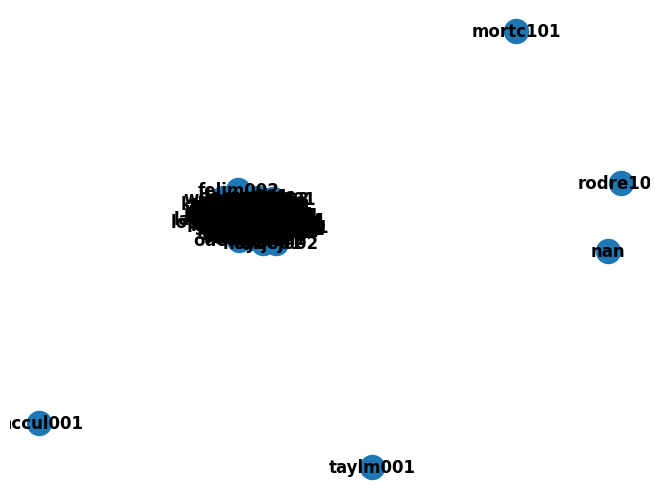

In [76]:
nx.draw(G, with_labels=True, font_weight="bold")
import matplotlib.pyplot as plt

plt.show()

In [87]:
from baseball_id import Lookup